# Importing Libraries and Loading Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Basic Checks

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

Class 0: Iris setosa

Class 1: Iris versicolor

Class 2: Iris virginica


In [11]:
class_names = {
    0: 'Iris setosa',
    1: 'Iris versicolor',
    2: 'Iris virginica'
}
df['target_name'] = df['target'].map(class_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,Iris setosa
1,4.9,3.0,1.4,0.2,0,Iris setosa
2,4.7,3.2,1.3,0.2,0,Iris setosa
3,4.6,3.1,1.5,0.2,0,Iris setosa
4,5.0,3.6,1.4,0.2,0,Iris setosa


# Exploratory Data Analysis

#### To observe the relationship between all the features with respect to the target we will create a pairplot

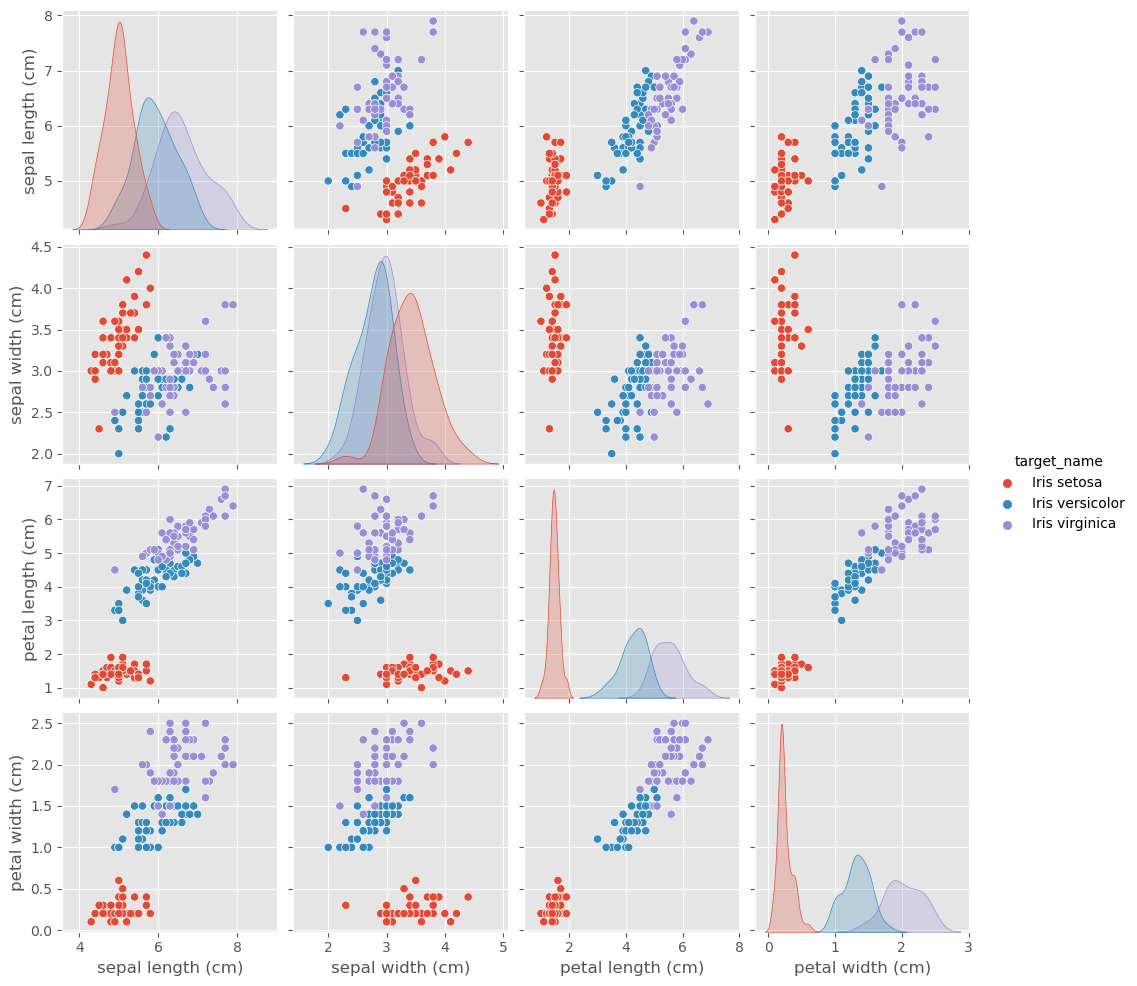

In [13]:
sns.pairplot(data=df.drop(["target"],axis = 1),hue ="target_name");

**Our Findings:**


1) Petal length and Petal width are positively correlated with each other.

2) Based on its features Iris setosa is easily separable as its features are unique and quite different from other iris.

3) The more petal length and petal width an iris has chances of it being an iris virginica is high.

#### Observing the distribution of numercial features

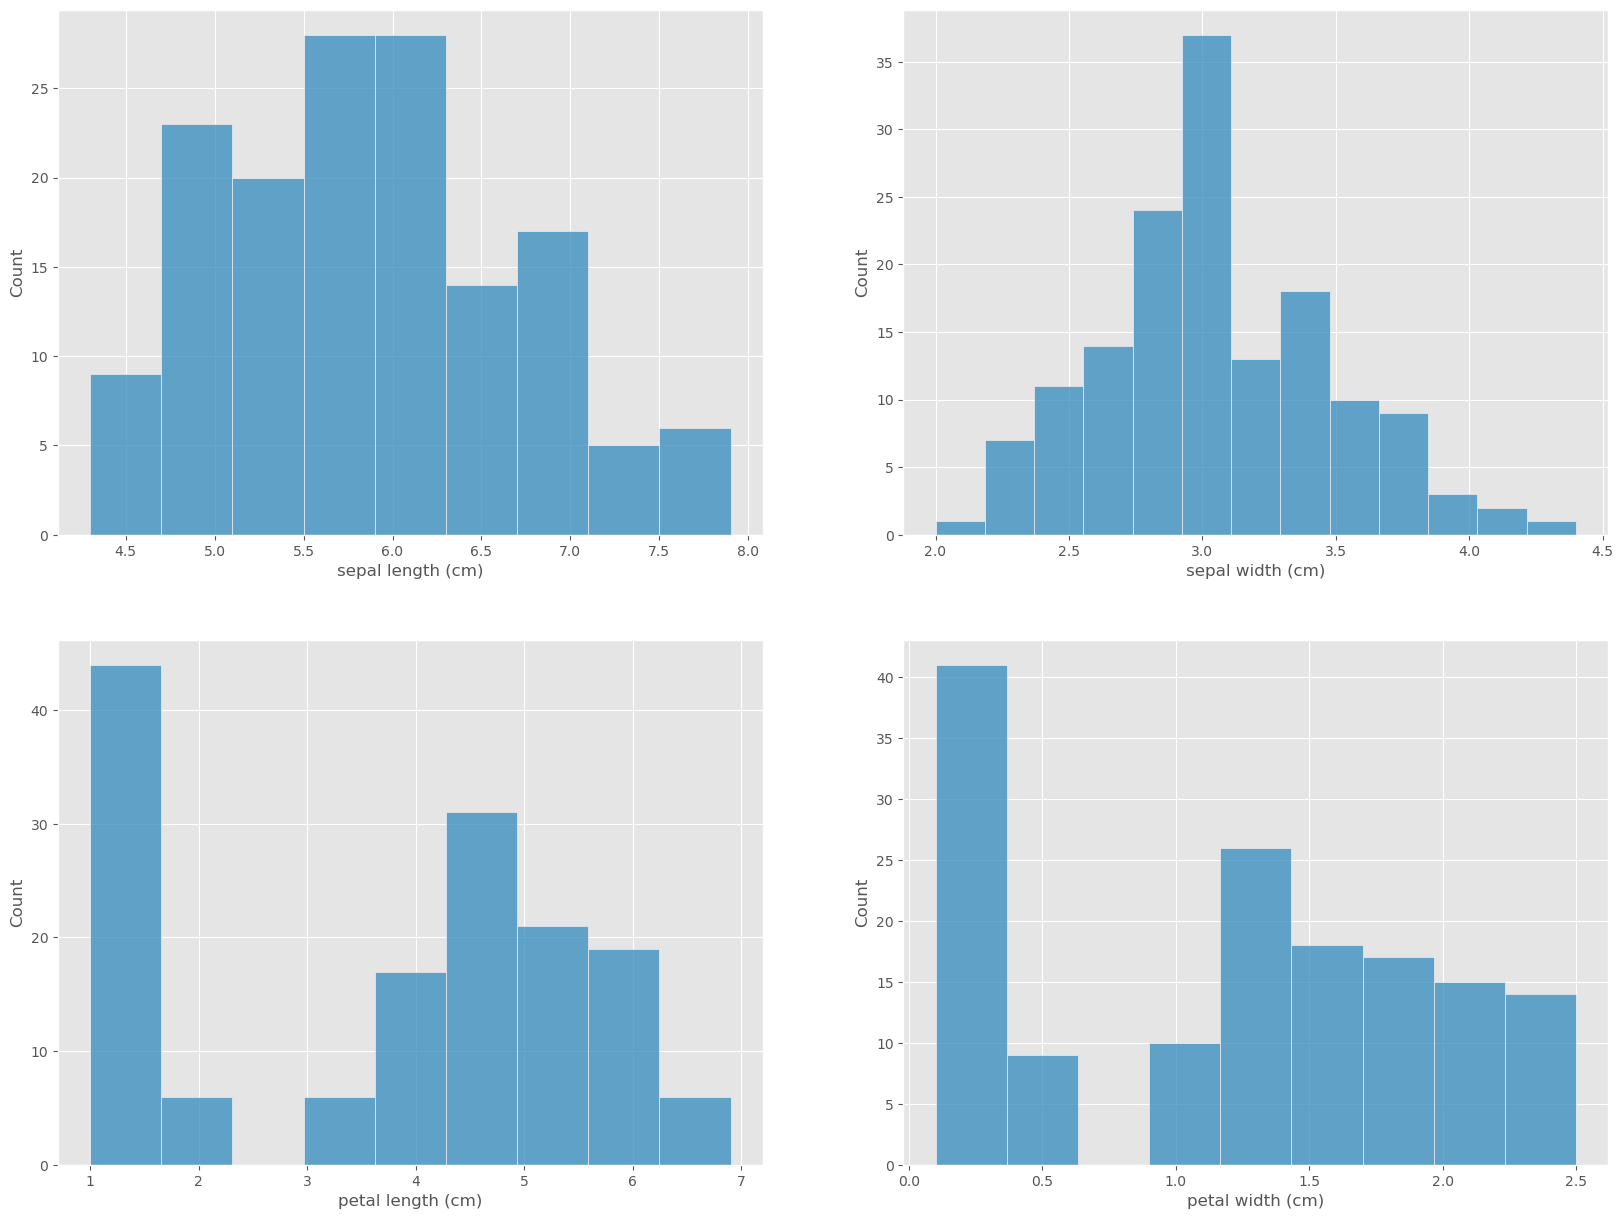

In [14]:
columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
#colors = ["#e62e00", "#00b300"]

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axs[i])

plt.show()


**Our Findings:**

1) Sepal length and sepal width are more or less normally distributed

#### Finding the distribution of target column

In [15]:
sns.countplot(data =df,x="target_name");

**Our Findings:**

We find that the iris dataset is a balanced dataset

## Feature engineering

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,Iris setosa
1,4.9,3.0,1.4,0.2,0,Iris setosa
2,4.7,3.2,1.3,0.2,0,Iris setosa
3,4.6,3.1,1.5,0.2,0,Iris setosa
4,5.0,3.6,1.4,0.2,0,Iris setosa


There is no need for feature engineering as all the data is already scaled and there are not missing values or outliers

# Model Building

### Spliting the data

In [17]:
X = df.drop(["target","target_name"],axis =1)

In [18]:
y =df["target"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Define the models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB())
]

# Create an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
# Evaluate each model 
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}, ignore_index=True)
# Print the evaluation metrics DataFrame
metrics_df['Mean'] = (metrics_df["Accuracy"] + metrics_df["Precision"] + metrics_df["Recall"] + metrics_df["F1-score"])/4
metrics_df.sort_values(by=['Mean'],ascending=False)


,Model,Accuracy,Precision,Recall,F1-score,Mean
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0,1.0
2,Random Forest,1.0,1.0,1.0,1.0,1.0
3,Gradient Boosting,1.0,1.0,1.0,1.0,1.0
4,KNN,1.0,1.0,1.0,1.0,1.0
5,GaussianNB,1.0,1.0,1.0,1.0,1.0


# Conclusion

We are getting 100  % accuracy in all models which can be due to overfitting